<a href="https://colab.research.google.com/github/ussvarma/time_series_analysis/blob/main/ARIMA_Model_For_Temperature_Forecast_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np

#Read Data Air passengers and data preprocessing


In [ ]:
df=pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (144, 1)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


# Viusalizing seasonal decomposition

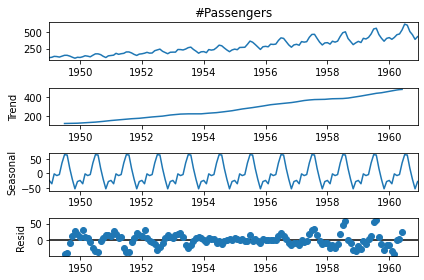

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['#Passengers'], 
                            model ='')
#print(dir(result))
# ETS plot 
result.plot();

## visualise the time series

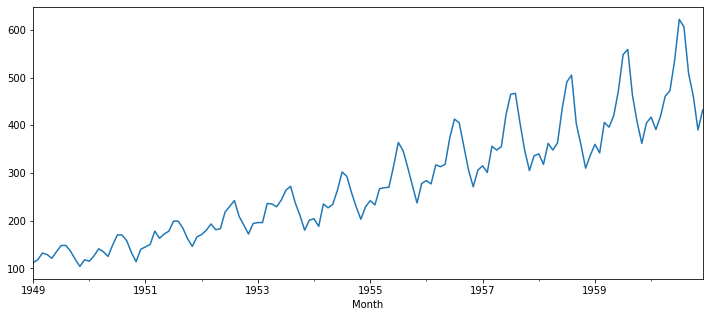

In [ ]:
df['#Passengers'].plot(figsize=(12,5))

#Check For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['#Passengers'])

1. ADF :  0.8153688792060472
2. P-Value :  0.991880243437641
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


### as p value is greather than 0.05 then we can conclude as non-stationary dataset

#Figure Out Order for ARIMA Model

In [ ]:
#!pip install pmdarima
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['#Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.35 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.36 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.39 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.46 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.25 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.55 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.73 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.15 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.75 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 01 Jun 2022   AIC                           1019.178
Time:                                     12:26:16   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data into Training and Testing

In [ ]:
print(df.shape)
train=df.iloc[:-12]
test=df.iloc[-12:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(144, 1)
(132, 1) (12, 1)
#Passengers    417
Name: 1960-01-01 00:00:00, dtype: int64 #Passengers    432
Name: 1960-12-01 00:00:00, dtype: int64


## Train the Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['#Passengers'],order=(0,1,1))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  132
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -629.598
Date:                Wed, 01 Jun 2022   AIC                           1263.195
Time:                        12:26:16   BIC                           1268.945
Sample:                    01-01-1949   HQIC                          1265.532
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3730      0.089      4.208      0.000       0.199       0.547
sigma2       873.9665     94.243      9.274      0.000     689.254    1058.679
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 3.60
Prob(Q):                              0.83   Prob(JB):                         0.17
Heteroskedasticity (H):               7.26   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Make Predictions on Test Set

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
#pred.plot(legend=True)
#test['#Passengers'].plot(legend=True)
print(pred)


1960-01-01    426.168213
1960-02-01    426.168213
1960-03-01    426.168213
1960-04-01    426.168213
1960-05-01    426.168213
1960-06-01    426.168213
1960-07-01    426.168213
1960-08-01    426.168213
1960-09-01    426.168213
1960-10-01    426.168213
1960-11-01    426.168213
1960-12-01    426.168213
Freq: MS, Name: ARIMA predictions, dtype: float64


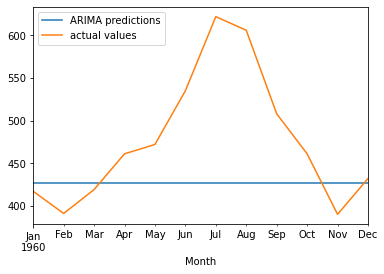

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['#Passengers'].plot(label="actual values",legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['#Passengers']))
print(rmse)


89.66224158757768


In [ ]:
model2=ARIMA(df['#Passengers'],order=(1,0,5))
model2=model2.fit()
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


#For Future Dates

In [ ]:
#index_future_dates=pd.date_range(start='1960-12-01',end='1961-12-01')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+12,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
#pred.index=index_future_dates
print(pred)

1961-01-01    460.008080
1961-02-01    419.666285
1961-03-01    464.500365
1961-04-01    457.605823
1961-05-01    455.852936
1961-06-01    455.307007
1961-07-01    454.762776
1961-08-01    454.220238
1961-09-01    453.679388
1961-10-01    453.140220
1961-11-01    452.602729
1961-12-01    452.066910
1962-01-01    451.532758
Freq: MS, Name: ARIMA Predictions, dtype: float64


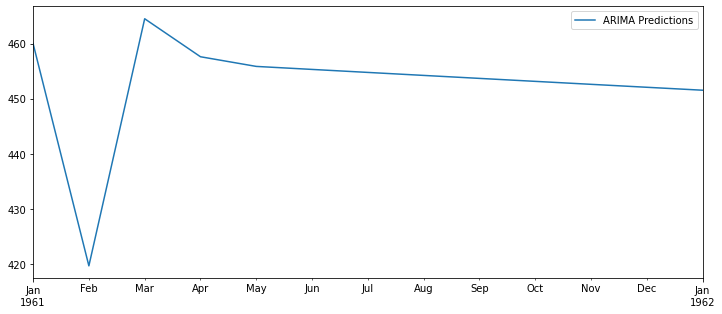

In [ ]:
pred.plot(figsize=(12,5),legend=True)


# Sarima model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = ARIMA(df['#Passengers'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 0, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       #Passengers   No. Observations:                  144
Model:             ARIMA(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                           Wed, 01 Jun 2022   AIC                           1019.178
Time:                                   12:26:18   BIC                           1030.679
Sample:                               01-01-1949   HQIC                          1023.851
                                    - 12-01-1960                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

1960-01-01    418.510382
1960-02-01    397.525025
1960-03-01    452.792575
1960-04-01    419.639977
1960-05-01    470.381541
1960-06-01    526.844353
1960-07-01    608.042321
1960-08-01    630.591419
1960-09-01    511.058149
1960-10-01    456.766670
1960-11-01    412.628553
1960-12-01    438.478199
Freq: MS, Name: Predictions, dtype: float64


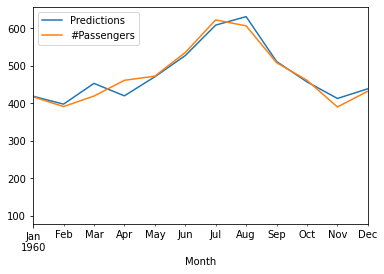

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
print(predictions)
# plot predictions and actual values
predictions.plot(legend = "Sarima predictions")
df['#Passengers'].plot(xlim=["1960-01-01","1960-12-01"],legend="actual values")

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(test["#Passengers"], predictions)

19.033801814623217

# Exponential smoothening method

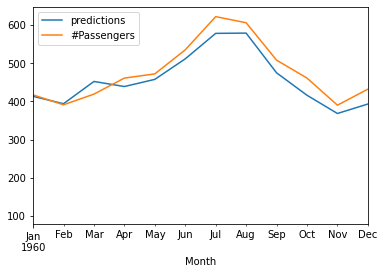

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# create class
model = ExponentialSmoothing(train,seasonal="additive",seasonal_periods=12)
# fit model
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start,end)
yhat.plot(legend = True,label="predictions")
df['#Passengers'].plot(xlim=["1960-01-01","1960-12-01"],legend="actual values")

In [ ]:
print(yhat)

1960-01-01    413.107910
1960-02-01    393.812641
1960-03-01    452.157917
1960-04-01    438.880338
1960-05-01    457.609052
1960-06-01    511.410173
1960-07-01    578.175241
1960-08-01    578.872931
1960-09-01    474.768394
1960-10-01    416.019552
1960-11-01    368.197187
1960-12-01    393.054725
Freq: MS, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
 
# Calculate root mean squared error
rmse(test["#Passengers"], yhat)

29.085406418699684